In [1]:
from skimage import data, io
import matplotlib.pyplot as plt
import numpy as np

DPI = 96

def show(im, size=None):
    if not size:
        size = (im.shape[1], im.shape[0])
    plt.figure(figsize=(size[0]/DPI, size[1]/DPI), dpi=DPI)
    io.imshow(im)
    io.show()

## CS484 Image Analysis Notes - Week 1

**Bit plane**: BInary matrix showing whether a bit in pixel is 1 or 0. 1st bit plane is like 50% threshold binarization. Can be used in compression and burying data into images.

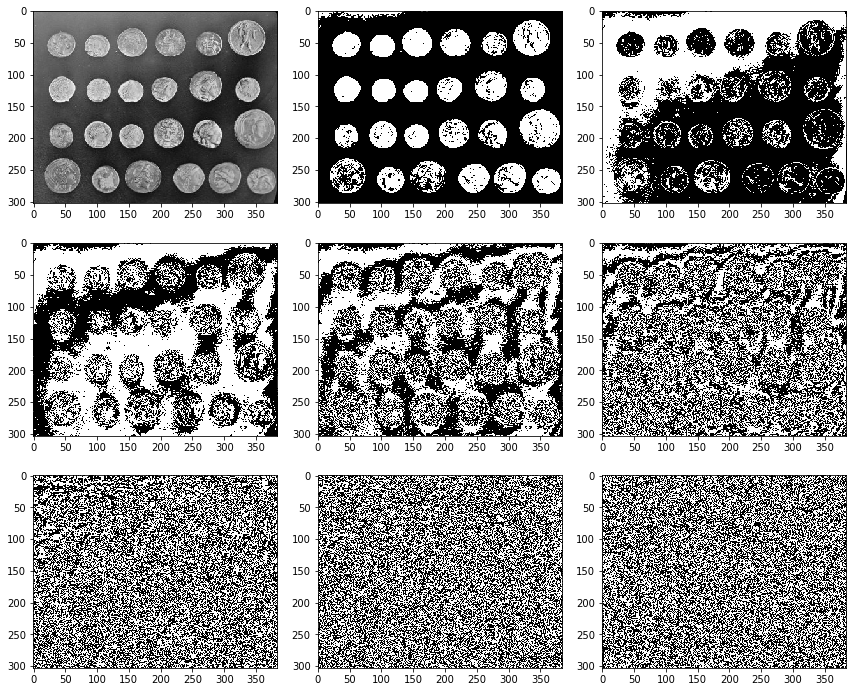

In [20]:
# Bit plane example
source = data.coins()
plt.figure(figsize = (12, 10))
plt.subplot(3, 3, 1)
io.imshow(source)
mask_lst = [0b10000000, 0b01000000, 0b00100000, 0b00010000,
            0b00001000, 0b00000100, 0b00000010, 0b00000001]
for i, mask in enumerate(mask_lst):
    im = np.bitwise_and(source, mask)
    im[im == mask] = 255
    plt.subplot(3, 3, i + 2)
    io.imshow(im)
    
plt.show()

Original Image


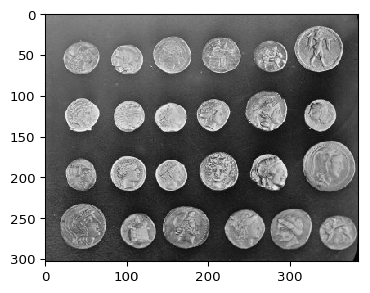

Image with hidden message


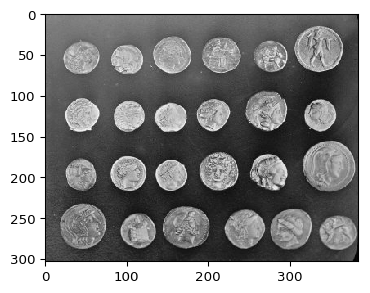

Hidden image


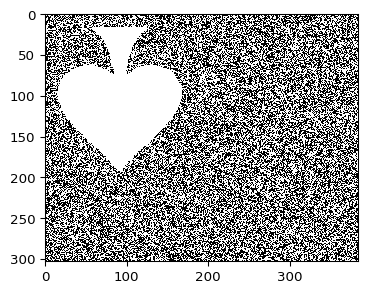

In [42]:
spade = io.imread('spade.png')
source = data.coins()

print('Original Image')
show(source)

im = source.copy()
mask = np.zeros(im.shape, dtype=bool)
mask[:spade.shape[0], :spade.shape[1]] = spade == 0
im[mask] = np.bitwise_or(im[mask], 0b00000001)
print('Image with hidden message')
show(im)

im = np.bitwise_and(im, 0b00000001)
im[im == mask] = 255
print('Hidden image')
show(im)